# Data exploration

In [50]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import os
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"]= "-1"

In [51]:
# Load training data form NPZ file

train_data = "train.npz"
images = np.load(train_data)["pixels"]
labels = np.load(train_data)["labels"]



In [54]:
images[:,:,:,0].shape

(280, 299, 299)

In [20]:
def show_image_category(X, y, category):

    i = 0
    idx = 0
    
    while i < 3 :
        
        if y[idx] == category :
            img = X[idx]
            # Print label using the output vector y
            print('Label:', y[idx])
        
            # Plot image with pyplot
            plt.imshow(img)
            plt.show()
            i += 1
            idx += 1
        
        else :
            idx += 1

### Display images

Label: 0.0


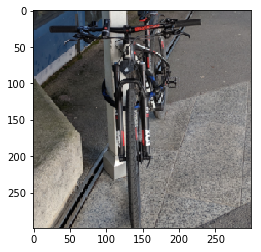

Label: 0.0


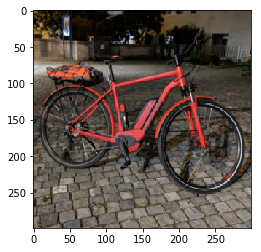

Label: 0.0


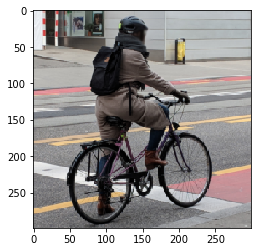

Label: 1.0


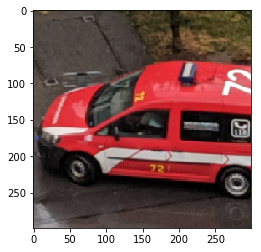

Label: 1.0


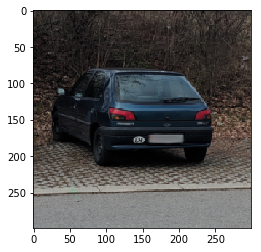

Label: 1.0


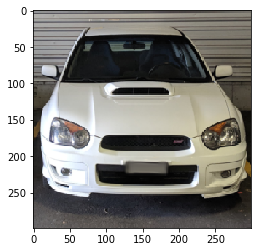

Label: 2.0


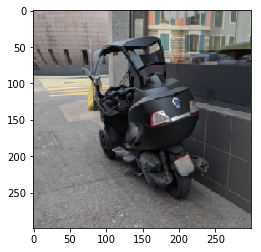

Label: 2.0


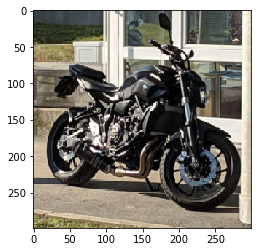

Label: 2.0


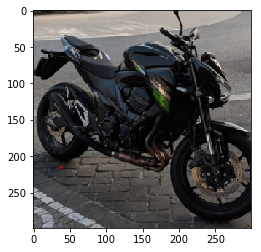

Label: 3.0


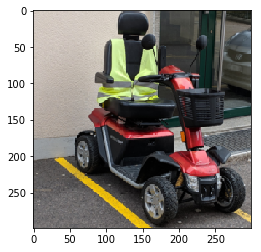

Label: 3.0


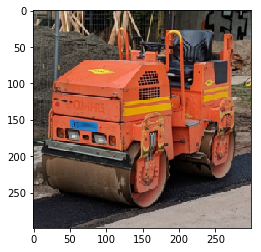

Label: 3.0


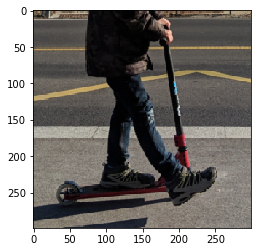

Label: 4.0


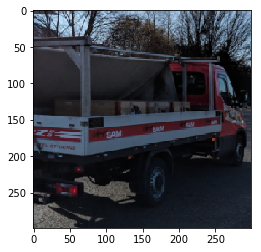

Label: 4.0


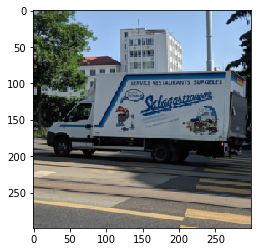

Label: 4.0


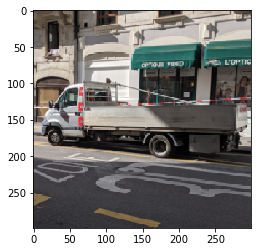

Label: 5.0


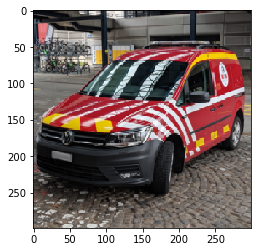

Label: 5.0


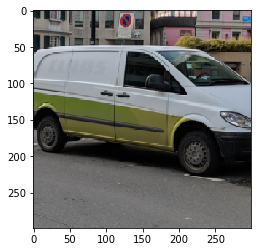

Label: 5.0


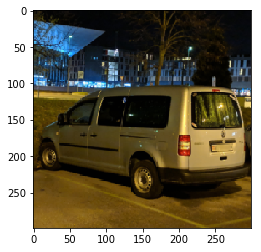

In [28]:
# Show the first images from the training set in each "cat" category
for cat in list(set(labels)):
    show_image_category(images, labels, cat)

### Principal Components Analysis on high-level features

In [77]:
from sklearn.decomposition import PCA

In [78]:
features = np.load(train_data)["features"]
print("Features", features.shape)

Features (280, 2048)


In [79]:
# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to fit
pca.fit(features)

# Proportion of variance explained
pve = pca.explained_variance_ratio_
pve

array([1.53481275e-01, 1.23808324e-01, 8.61112699e-02, 4.71719392e-02,
       3.12196687e-02, 2.46983357e-02, 2.11275835e-02, 1.85619146e-02,
       1.58195756e-02, 1.53921470e-02, 1.28788995e-02, 1.23324944e-02,
       1.19362427e-02, 1.07081831e-02, 1.05326576e-02, 9.98667814e-03,
       9.56324209e-03, 8.28736741e-03, 7.88162556e-03, 7.56494282e-03,
       7.36058317e-03, 6.98376261e-03, 6.68934733e-03, 6.53838273e-03,
       6.28921250e-03, 5.97676449e-03, 5.83768310e-03, 5.69406943e-03,
       5.49752871e-03, 5.37890056e-03, 5.09909540e-03, 4.86572366e-03,
       4.75826254e-03, 4.67764540e-03, 4.62953420e-03, 4.48839832e-03,
       4.45480272e-03, 4.30683047e-03, 4.10638098e-03, 4.00375901e-03,
       3.87094077e-03, 3.83830559e-03, 3.70370969e-03, 3.69808893e-03,
       3.60395433e-03, 3.58287850e-03, 3.46154370e-03, 3.39393783e-03,
       3.31514725e-03, 3.25033744e-03, 3.15418071e-03, 3.12739192e-03,
       3.08713061e-03, 2.98806024e-03, 2.97595165e-03, 2.91296863e-03,
      